<a href="https://colab.research.google.com/github/MavClarito/Emerging-Tech-2/blob/main/Clarito_Assignment_9_1_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 9.1 : Convolutional Neural Network** |
**Members:** | Clarito, Vincent Maverick
**Section** | CPE32S9
**Date Performed**: | 04/24/2024
**Date Submitted**: | 04/24/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

Instructions:

1.   Choose any dataset applicable to an image classification problem
2.   Explain your datasets and the problem being addressed.
3.   Show evidence that you can do the following:
  *  Using your dataset, create a baseline model of the CNN
  *  Perform image augmentation
  *  Perform feature standardization
  *  Perform ZCA whitening of your images
  *  Augment data with random rotations, shifts, and flips
  *  Save augmented image data to disk
  *  Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task
  *  Explore extensions to a baseline model to improve learning and model capacity.
  *  Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.
  
Submit the link to your Google Colab (make sure that it is accessible to me) and the link to your dataset/s

**1.Choose any dataset applicable to an image classification problem:**
> https://github.com/zalandoresearch/fashion-mnist

**2.Explain your datasets and the problem being addressed:**
> It's basically a collection of grayscale images that represent various fashion items like clothes and accessories. The dataset is like an upgraded version of the famous MNIST dataset that we often use for handwritten digit recognition.

# **3.Show evidence that you can do the following:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
start_time = time.time()
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.optimizers import SGD
from keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load dataset
def load_dataset():
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    return train_images, train_labels, test_images, test_labels

# Prepare pixel data
def prep_pixels(train_images, test_images):
    train_images = train_images.astype('float32') / 255.0
    test_images = test_images.astype('float32') / 255.0
    return train_images, test_images

#1.) Using your dataset, create a baseline model of the CNN
def define_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def summarize_diagnostics(history):
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

#7.)Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task
def run_test_harness():
    start_time = time.time()
    train_images, train_labels, test_images, test_labels = load_dataset()
    train_images, test_images = prep_pixels(train_images, test_images)
    model = define_model()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels), verbose=1)
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    print('> Test Accuracy: %.3f' % (acc * 100.0))
    summarize_diagnostics(history)
    end_time = time.time()
    total_time = (end_time - start_time) / 60
    print("Total time taken:", total_time, "minutes")

run_test_harness()

Epoch 1/10
938/938 [==============================] - 38s 40ms/step - loss: 0.4156 - accuracy: 0.8533 - val_loss: 0.3176 - val_accuracy: 0.8881
Epoch 2/10
938/938 [==============================] - 37s 39ms/step - loss: 0.2762 - accuracy: 0.9010 - val_loss: 0.2817 - val_accuracy: 0.8946
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2333 - accuracy: 0.9153 - val_loss: 0.2824 - val_accuracy: 0.8963
Epoch 4/10
938/938 [==============================] - 37s 40ms/step - loss: 0.2013 - accuracy: 0.9267 - val_loss: 0.2708 - val_accuracy: 0.9032
Epoch 5/10
938/938 [==============================] - 36s 39ms/step - loss: 0.1780 - accuracy: 0.9341 - val_loss: 0.2611 - val_accuracy: 0.9060
Epoch 6/10
938/938 [==============================] - 38s 40ms/step - loss: 0.1565 - accuracy: 0.9428 - val_loss: 0.2537 - val_accuracy: 0.9131
Epoch 7/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1357 - accuracy: 0.9498 - val_loss: 0.2576 - val_accuracy:

**Comments:**
> This model achieved good accuracy of 91.16% on unseen test data. Although it took a lot of time to run maybe because it runs images instead of numerical data.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


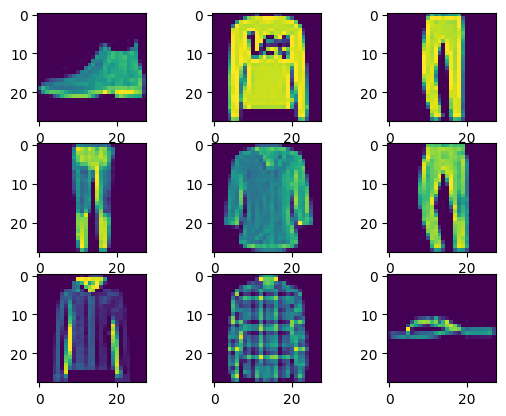

In [ ]:
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_images[i])
pyplot.show()

**Comments:**
> This shows a visual glimpse of the actual images of the dataset I used, which can be valuable for understanding the data before proceeding with model training and evaluation.

*   Perform image augmentation

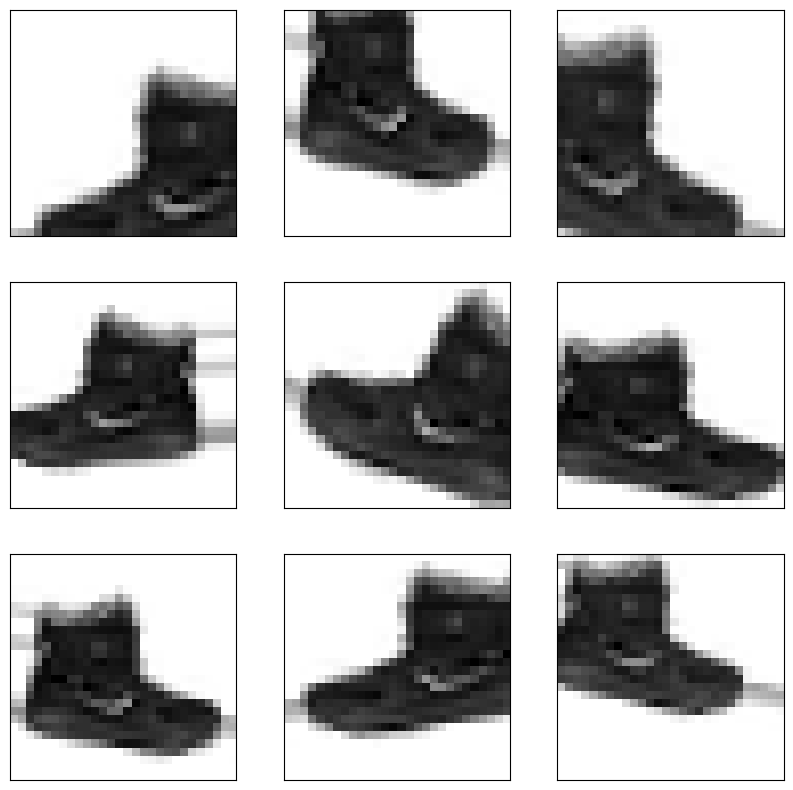

In [ ]:
#2.)This is creates an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
sample_image = train_images[0].reshape((1,) + train_images[0].shape + (1,))
augmented_images = np.array([datagen.random_transform(sample_image[0]) for _ in range(9)])

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Comments:**
> This seems to show the same image with different angles.

*   Perform feature standardization, ZCA whitening with random rotations, shifts, and flips and save augmented image data to disk.

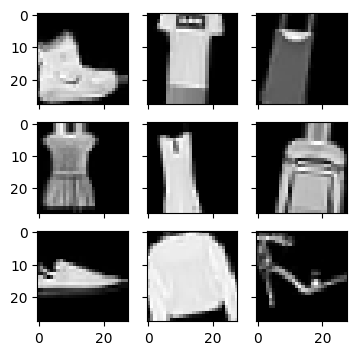

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#3-5.)Perform feature standardization and ZCA whitening with random rotations, shifts, and flips
datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_images_reshaped = train_images.reshape(-1, 28, 28, 1)

#6.)Save augmented image data to disk
for X_batch, y_batch in datagen.flow(train_images_reshaped, train_labels, batch_size=9, shuffle=False,
                                     save_to_dir='/content/drive/My Drive/Datasets/Assignment9.1',
                                     save_prefix='aug', save_format='png'):
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i * 3 + j].reshape(28, 28), cmap=plt.get_cmap("gray"))
    plt.show()
    break

**Comments:**
> I noticed that the code segment uses an ImageDataGenerator to perform data augmentation with various transformations such as rotation, shifts, flips, and more. This augmentation introduces diversity into the training data, helping the model generalize better and handle variations in input images.

*   Explore extensions to a baseline model to improve learning and model capacity.

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

def run_test_harness(model_func):
    start_time = time.time()
    train_images, train_labels, test_images, test_labels = load_dataset()
    train_images, test_images = prep_pixels(train_images, test_images)
    model = model_func()
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)
    _, acc = model.evaluate(test_images, test_labels, verbose=0)
    print('> Test Accuracy: %.3f' % (acc * 100.0))
    summarize_diagnostics(history)
    end_time = time.time()
    total_time = (end_time - start_time) / 60
    print("Total time taken:", total_time, "minutes")
    return history

extended_model_history = run_test_harness(define_extended_model)


def define_extended_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

extended_model_history = run_test_harness(define_extended_model)

Epoch 1/10
469/469 [==============================] - 132s 278ms/step - loss: 0.5201 - accuracy: 0.8108 - val_loss: 0.3619 - val_accuracy: 0.8776
Epoch 2/10
469/469 [==============================] - 126s 269ms/step - loss: 0.3358 - accuracy: 0.8762 - val_loss: 0.2970 - val_accuracy: 0.8919
Epoch 3/10
469/469 [==============================] - 125s 266ms/step - loss: 0.2910 - accuracy: 0.8925 - val_loss: 0.2660 - val_accuracy: 0.8990
Epoch 4/10
469/469 [==============================] - 132s 282ms/step - loss: 0.2596 - accuracy: 0.9050 - val_loss: 0.2555 - val_accuracy: 0.9057
Epoch 5/10
469/469 [==============================] - 126s 269ms/step - loss: 0.2396 - accuracy: 0.9119 - val_loss: 0.2591 - val_accuracy: 0.9019
Epoch 6/10
469/469 [==============================] - 125s 267ms/step - loss: 0.2173 - accuracy: 0.9188 - val_loss: 0.2606 - val_accuracy: 0.9063
Epoch 7/10
469/469 [==============================] - 125s 267ms/step - loss: 0.2071 - accuracy: 0.9230 - val_loss: 0.2452 -

**Comments:**
> I tried running it twice and I noticed that the initial accuracy decreased after the first one and maybe because of the randomness of the training since there weren't any significant difference between them.

*  Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

In [ ]:
from PIL import Image
import os

def load_new_images(directory):
    new_images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            new_images.append(image)
    return new_images

directory_path = "/content/drive/My Drive/Datasets/Assignment9.1"
new_images = load_new_images(directory_path)

In [ ]:
def define_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model()
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

new_images = load_new_images()
predictions = model.predict(new_images)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted Classes:", predicted_classes)


Epoch 1/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.4637 - accuracy: 0.8325 - val_loss: 0.3388 - val_accuracy: 0.8755
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3091 - accuracy: 0.8882 - val_loss: 0.2886 - val_accuracy: 0.8924
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2603 - accuracy: 0.9043 - val_loss: 0.2888 - val_accuracy: 0.8940
Epoch 4/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2287 - accuracy: 0.9153 - val_loss: 0.2542 - val_accuracy: 0.9078
Epoch 5/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2009 - accuracy: 0.9259 - val_loss: 0.2607 - val_accuracy: 0.9076
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1807 - accuracy: 0.9330 - val_loss: 0.2390 - val_accuracy: 0.9119
Epoch 7/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1592 - accuracy: 0.9407 - val_loss: 0.2479 -

TypeError: load_new_images() missing 1 required positional argument: 'directory'

**Conclusion:**
> In this activity, I learned how to build and train a Convolutional Neural Network (CNN) model for image classification using the Fashion-MNIST dataset. I encountered challenges such as handling data augmentation parameters effectively and ensuring proper preprocessing steps for improved model performance.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Clarito_Assignment_9_1_Convolutional_Neural_Network.ipynb

[NbConvertApp] Converting notebook /content/Clarito_Assignment_9_1_Convolutional_Neural_Network.ipynb to html
[NbConvertApp] Writing 724203 bytes to /content/Clarito_Assignment_9_1_Convolutional_Neural_Network.html
